## Decision Tree Classification

**Importing Libraries**

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Loading the dataset**

In [15]:
data = pd.read_csv('Social_network_ads.csv')
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [16]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

**Splitting the dataset into train set and test set**

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

**Feature Scaling**

In [18]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
#X_train_=sc.fit_transform(X_train)
#X_test_=sc.transform(X_test)

**Training Decision Tree Model with Train Set**

In [19]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

**Predict a new result**

In [20]:
classifier.predict([[30,87000]])

array([0], dtype=int64)

**Predicting the test set**

In [21]:
y_pred = classifier.predict(X_test)
table = pd.DataFrame({
    'Actual Purchase': y_test,
    'Predicted Purchase': y_pred
})
table.head(50)

,Actual Purchase,Predicted Purchase
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,0


**Confusion Matrix**

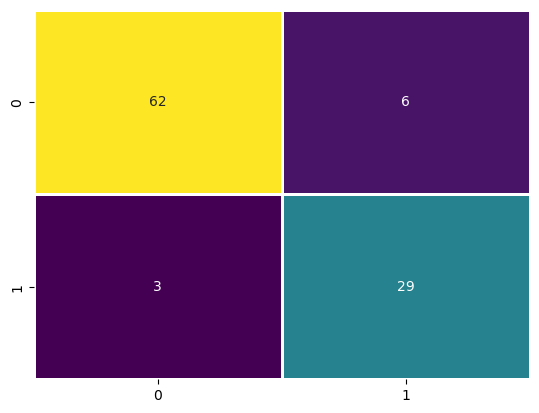

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score
conf = confusion_matrix(y_test,y_pred)
sns.heatmap(conf,annot=True,lw=.9,cmap='viridis',cbar=False);

In [23]:
accuracy_score(y_test,y_pred)

0.91

**Visualizing the train set results**

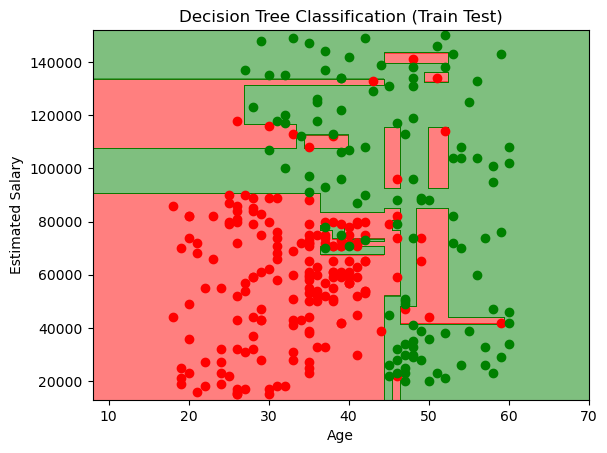

In [24]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_train,y_train
X1,X2=np.meshgrid(np.linspace(X_set[:,0].min()-10,X_set[:,0].max()+10,1000), 
                  np.linspace(X_set[:,1].min()-2000,X_set[:,1].max()+2000,1000))
Z=classifier.predict(np.array([X1.ravel(),X2.ravel()]).T)
plt.contourf(X1,X2,Z.reshape(X1.shape),alpha=.5,cmap=ListedColormap(('red','green')))

for i in np.unique(y_set):
    plt.scatter(X_set[y_set==i,0],X_set[y_set==i,1],c=['red','green'][i],label=i)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Decision Tree Classification (Train Test)');

**Visualizing the train set results**

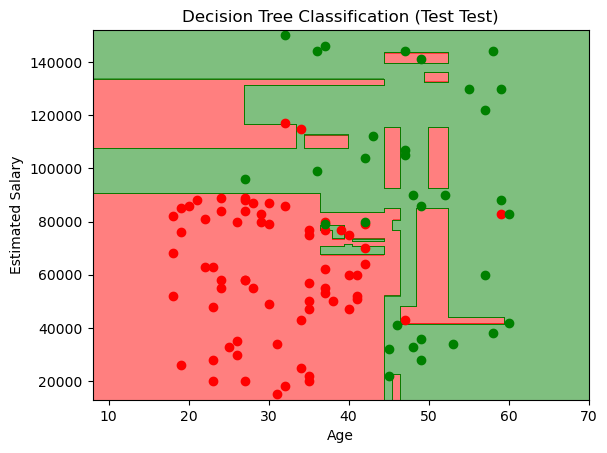

In [25]:
from matplotlib.colors import ListedColormap
X_set,y_set=X_test,y_test
X1,X2=np.meshgrid(np.linspace(X_set[:,0].min()-10,X_set[:,0].max()+10,1000), 
                  np.linspace(X_set[:,1].min()-2000,X_set[:,1].max()+2000,1000))
Z=classifier.predict(np.array([X1.ravel(),X2.ravel()]).T)
plt.contourf(X1,X2,Z.reshape(X1.shape),alpha=.5,cmap=ListedColormap(('red','green')))

for i in np.unique(y_set):
    plt.scatter(X_set[y_set==i,0],X_set[y_set==i,1],c=['red','green'][i],label=i)
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Decision Tree Classification (Test Test)');